In [1]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#Load the dataset
dataset = pd.read_csv('Iris.csv')

In [4]:
#Look at top 5 values
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
#Select only Annual Income and Spending Score
X = dataset.iloc[:, [3,4]].values

In [24]:
#Import KMeans clustering
from sklearn.cluster import KMeans

In [25]:
#List to store withing cluster sum of square
wcss = []

In [26]:
#Fit the KMeans algorithm with different values of k
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, 
                    init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

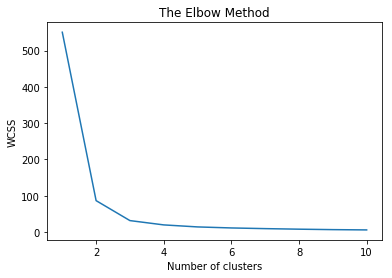

In [27]:
#Plot the wcss values
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel('WCSS')
plt.show()

In [28]:
#Fit the KMeans clustering algo with k = 5
kmeans =  KMeans(n_clusters = 3, 
                    init = 'k-means++',
                    max_iter = 300, n_init = 10, random_state=0)

In [29]:
#Make prediction
y_kmeans = kmeans.fit_predict(X)

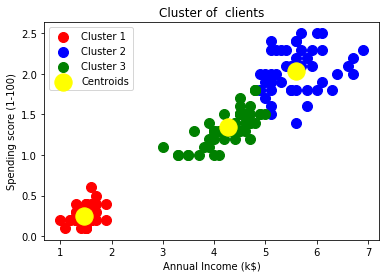

In [30]:
#Visualising the custers
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], 
            s = 100, c ='red', label = 'Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], 
            s = 100, c ='blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], 
            s = 100, c ='green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 300, c ='yellow', label = 'Centroids')
plt.title('Cluster of  clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()